In [1]:
import json
import os 
import spacy
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

2024-03-25 16:44:17.968302: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 16:44:23.605955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 16:44:27.240838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!python -m spacy download en_core_web_sm

2024-03-25 16:44:50.245579: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 16:44:50.282305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 16:44:51.574379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can n

calculate the distance between source and target

In [3]:
GOLD_DCT_FILE = "/users/the/NER_MTB/0_breast_train_gold_dct.json"

def cal_sents_bet(GOLD_DCT_FILE):
    with open(GOLD_DCT_FILE, "r") as infile:
        dct = json.load(infile)
    sent_bet = []
    for pat_id in dct.keys():
        for filename in dct[pat_id].keys():
            raw_note = dct[pat_id][filename]["raw_note"]
            rel_lst = dct[pat_id][filename]["chemo_time_rel"]
            chemo_id_lst, chemo_span_lst = dct[pat_id][filename]["pair_wise"]["chemo"]["ment_id"], dct[pat_id][filename]["pair_wise"]["chemo"]["span"]
            time_id_lst, time_span_lst = dct[pat_id][filename]["pair_wise"]["time"]["ment_id"], dct[pat_id][filename]["pair_wise"]["time"]["span"]

            source_id_lst, target_id_lst = rel_lst["source_id"], rel_lst["target_id"]
            if len(source_id_lst) == 0:
                continue
            else:
                for sid, tid in zip(source_id_lst, target_id_lst):
                    if sid in chemo_id_lst: 
                        chemo_ind = chemo_id_lst.index(sid)
                        try:
                            time_ind = time_id_lst.index(tid)
                        except: 
                            print(pat_id, filename, sid, tid)
                    else: 
                        chemo_ind = chemo_id_lst.index(tid)
                        time_ind = time_id_lst.index(sid)
                    chemo_span = chemo_span_lst[chemo_ind]
                    time_span = time_span_lst[time_ind]
                    if int(chemo_span[0]) < int(time_span[0]):
                        start_ind = int(chemo_span[0]) 
                        end_ind = int(time_span[1])
                    else:
                        start_ind = int(time_span[0]) 
                        end_ind = int(chemo_span[1])
            sents = raw_note[start_ind: end_ind]
            sents = sents.rstrip('\n') + ' '
            # sents = sents.rstrip('\t') + ' '
            spacy_better = spacy.load("en_core_web_sm")
            num_sents = len(list(spacy_better(sents).sents))
            sent_bet.append(num_sents)
    return sent_bet 
    print(f"mean num sents between {np.mean(sent_bet)}")

breast_train_lst = cal_sents_bet(GOLD_DCT_FILE)


In [ ]:
GOLD_DCT_FILE = "/users/the/NER_MTB/0_melanoma_train_gold_dct.json"
melanoma_train_lst = cal_sents_bet(GOLD_DCT_FILE)

GOLD_DCT_FILE = "/users/the/NER_MTB/0_ovarian_train_gold_dct.json"
ovarian_train_lst = cal_sents_bet(GOLD_DCT_FILE)

maximum: 3
Counter({1: 307, 2: 13, 3: 5})


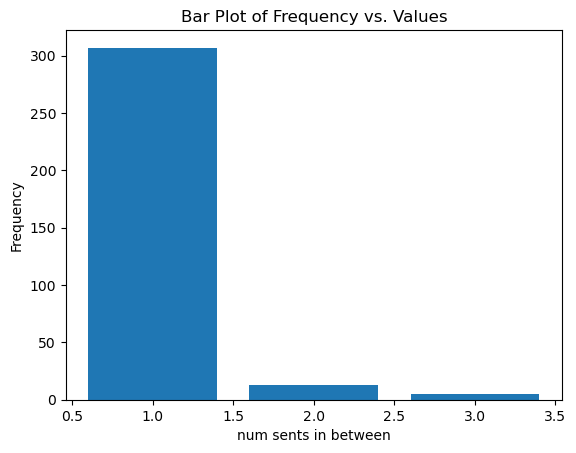

In [5]:
lst = []
lst += breast_train_lst
lst += melanoma_train_lst
lst += ovarian_train_lst
print(f"maximum: {np.max(lst)}")

counter = Counter(lst)
print(counter)
x_values = list(counter.keys())
y_values = list(counter.values())

# Create bar plot
plt.bar(x_values, y_values)
plt.xlabel('num sents in between')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency vs. Values')
plt.show()